In [15]:
# =======================================================================
import os
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import pyplot as plt 
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from itertools import chain, combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
# =======================================================================
os.chdir('C:\py\yelp')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\py\\yelp'

## 1. Preparation Steps

In [72]:
type6Var=['attributes_AcceptsInsurance','attributes_BikeParking','attributes_BYOB','attributes_BusinessAcceptsBitcoin',
          'attributes_BusinessAcceptsCreditCards','attributes_ByAppointmentOnly',
          'attributes_Caters','attributes_CoatCheck',
          'attributes_Corkage','attributes_DogsAllowed', 'attributes_DriveThru',  'attributes_GoodForDancing',
          'attributes_GoodForKids','attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
          'attributes_Open24Hours', 'attributes_OutdoorSeating',  'attributes_RestaurantsCounterService',
          'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups', 'attributes_RestaurantsPriceRange2',
          'attributes_RestaurantsReservations', 'attributes_RestaurantsTableService',  'attributes_RestaurantsTakeOut',
          'attributes_WheelchairAccessible', 'is_open', 'review_count', 'stars', 'state',
          'aveZipScores']# type 6 for business dataset 
#
type6Var_reviews=['stars']

type6Var_users=['average_stars','compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot',
          'compliment_list','compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 
          'compliment_profile',  'compliment_writer',  'cool', 'fans', 'funny','harshness',
                 'review_count','useful']#type 6 for reviews and users
type9Var=['attributes_AcceptsInsurance','attributes_BikeParking','attributes_BYOB','attributes_BusinessAcceptsBitcoin',
          'attributes_BusinessAcceptsCreditCards','attributes_ByAppointmentOnly',
          'attributes_Caters','attributes_CoatCheck',
          'attributes_Corkage','attributes_DogsAllowed', 'attributes_DriveThru',  'attributes_GoodForDancing',
          'attributes_GoodForKids','attributes_HappyHour', 'attributes_HasTV','attributes_Open24Hours',
          'attributes_OutdoorSeating',  'attributes_RestaurantsCounterService',
          'attributes_RestaurantsDelivery', 'attributes_RestaurantsGoodForGroups','attributes_RestaurantsReservations',
          'attributes_RestaurantsTableService',  'attributes_RestaurantsTakeOut',
          'attributes_WheelchairAccessible']#subset og type 6, bool type
type8Var=['state']#subset of type6,attr to be removed to simplify the model 

naiveVar=['Ind','stars_x','attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y','harshness']
    
def preparation():
    # Read datasets
    business = pd.read_csv("business.csv") 
    users = pd.read_csv("users.csv")
    train_reviews = pd.read_csv("train_reviews.csv") 
    test_queries  = pd.read_csv("test_queries.csv")
    validate_queries = pd.read_csv("validate_queries.csv")
    ### type of attributes
    #1 meaningless
    #2 too hard to treat
    #3 seems irrelavent
    #4 maybe usefull after careful treatment
    #5 useful after simple treatment
    #6 useful and ready to use

    # 'Ind',
    #1 'Unnamed: 0',
    #1 'business_id',
    #3 'cool_x',
    #3 'date',
    #3 'funny_x',
    #1 'review_id',
    #6 'stars_x',
    #2 'text',
    #3 'useful_x',
    #1 'user_id',
    #2 'address',
    #1 'attributes',
    #6 'attributes_AcceptsInsurance',
    #1 'attributes_AgesAllowed', alomost null
    #5  'attributes_Alcohol',
    #4 'attributes_Ambience',
    #6 'attributes_BYOB',
    #5 'attributes_BYOBCorkage'
    #4 'attributes_BestNights',
    #5 'attributes_BikeParking',
    #6 'attributes_BusinessAcceptsBitcoin',
    #6 'attributes_BusinessAcceptsCreditCards',
    #5 'attributes_BusinessParking',
    #6 'attributes_ByAppointmentOnly',
    #6 'attributes_Caters',
    #6       'attributes_CoatCheck', 
    #6 'attributes_Corkage',
    #1 'attributes_DietaryRestrictions', 
    #6 'attributes_DogsAllowed',
    #6 'attributes_DriveThru', 
    #6 'attributes_GoodForDancing',
    #6 'attributes_GoodForKids', 
    #4 'attributes_GoodForMeal',
    #1 'attributes_HairSpecializesIn',
    #6 'attributes_HappyHour',
    #6 'attributes_HasTV', 
    #5 'attributes_Music', 
    #6 'attributes_NoiseLevel',
    #6 'attributes_Open24Hours', 
    #6 'attributes_OutdoorSeating',
    #5 'attributes_RestaurantsAttire', 
    #6 'attributes_RestaurantsCounterService',
    #6       'attributes_RestaurantsDelivery',
    #6 'attributes_RestaurantsGoodForGroups',
    #6 'attributes_RestaurantsPriceRange2',
    #6 'attributes_RestaurantsReservations',
    #6 'attributes_RestaurantsTableService', 
    #6 'attributes_RestaurantsTakeOut',
    #5 'attributes_Smoking', 
    #6 'attributes_WheelchairAccessible',
    #5 'attributes_WiFi', 
    #5 'categories', 'city', 'hours', 'hours_Friday',
    #3 'hours_Monday', 'hours_Saturday', 'hours_Sunday', 'hours_Thursday',
    #3       'hours_Tuesday', 'hours_Wednesday', 
    #6 'is_open', 
    #2'latitude', 'longitude',
    #1 'name_x',
    #3 'neighborhood', 
    #3 'postal_code',
    #6 'review_count_x',
    #6 'stars_y',
    #6 'state'
    #6 'aveBusinessSores' ??
    #6 'aveZipScores',
    #6 'average_stars',
    #6 'compliment_cool',
    #6 'compliment_cute',
    #6 'compliment_funny',
    #6 'compliment_hot',
    #6'compliment_list',
    #6 'compliment_more',
    #6 'compliment_note',
    #6 'compliment_photos',
    #6 'compliment_plain',
    #6 'compliment_profile', 
    #6 'compliment_writer', 
    #6 'cool_y',
    #5 'elite', 
    #6 'fans',
    #5 'friends',
    #6 'funny_y',
    #1'name_y',
    #6 'review_count_y',
    #6 'useful_y',
    #5 'yelping_since'
    #data perparation for business dataset
    data=business
    # add average score to each restaurant
    data['aveBusinessSores'] = data.groupby('business_id')['stars'].transform('mean')

    # add location effect (average score at per zip code) to each restaurant
    data['aveZipScores'] = data.groupby('postal_code')['stars'].transform('mean')

    data = data.fillna(value = -1)

    # NoiseLevel: Coding categorical variables with specific orders
    def noiseto4(x):
        if x=='quiet':
            return 0
        if x=='average':
            return 1
        if x=='loud':
            return 2
        if x=='very_loud':
            return 3
        return 1
    data['attributes_NoiseLevel'] =data['attributes_NoiseLevel'].apply(noiseto4)

    # set default value of pricerange -1 to 1
    def pricerangeto1(x):
        if x==-1:
            return 1.
        return x
    data['attributes_RestaurantsPriceRange2'] =data['attributes_RestaurantsPriceRange2'].apply(pricerangeto1)

    #choce useful attributions
    data = data[['business_id']+type6Var]
    data=data.drop(type8Var,axis=1)
    print("After droping certain trivial attributes in the dataset:", data.shape)

    def boolto2(x):
        if x==-1:
            return 0
        if x==False:
            return 0
        if x==True:
            return 1

    for attr in type9Var:
        data[attr]=data[attr].apply(boolto2)
    #print(data_drop.loc[1])
    #print(data_drop.loc[2])
    check=data.isnull().values.any()
    print("is there any value missing: ",check)

    #data_dummy = pd.get_dummies(data)
    #print("After creating dummy variables:", data_dummy.shape)

    #business_new=data_dummy
    business_new=data

    #print(business_new.head())
    #print(business_new.columns)

    # Yelping_since: Calculate the number of days the user has joined yelp till now
    data=users

    date_format = "%Y-%m-%d"
    today = datetime.strptime("2018-12-03", date_format)
    #print(data['yelping_since'].loc[4])
    data['yelping_since'] = data['yelping_since'].apply(lambda x: (today - datetime.strptime(x, date_format)).days)
    
    
    #add harshness attr to users
    harsh_df=pd.DataFrame.from_csv("harshness_allusers.csv",sep='\t')
    data=data.merge(harsh_df,on='user_id')
    
    data=data[['user_id']+type6Var_users]
    #print(data.loc[4])
    print("After droping certain trivial attributes in the dataset:", data.shape)

    check=data.isnull().values.any()
    print("is there any value missing: ",check)

    users_new=data
    #print(users_new.head())
    #print(users_new.columns)

    # Add an indicator variable to the datasets
    # 0 for training data
    # 1 for validating data
    # 2 for testing data

    train_reviews['Ind'] = 0
    print("shape of train_reviews:", train_reviews.shape)
    #print(train_reviews.columns)

    train_reviews_new=train_reviews[['Ind','business_id','user_id']+type6Var_reviews]
    print("After droping certain trivial attributes in the dataset:", train_reviews.shape)



    validate_queries['Ind'] = 1

    print("shape of validate_queries:", validate_queries.shape)
    print(validate_queries.columns)

    validate_queries_new=validate_queries.drop(['Unnamed: 0'],axis=1)
    print("After droping certain trivial attributes in the dataset:", validate_queries.shape)

    test_queries['Ind'] = 2
    print("shape of test_queries:", test_queries.shape)
    print(test_queries.columns)

    test_queries_new=test_queries

    data = train_reviews_new.append(test_queries_new)
    data = data.append(validate_queries_new)
    print("After combining training, validating and testing datasets:", data.shape)
    #print(data.columns)

    print(data[data['Ind']==0].shape)

    data = pd.merge(data, business_new, on='business_id')
    print("After merging our complete dataset with business attributes:", data.shape)

    data = pd.merge(data, users_new, on='user_id')
    print("After merging our complete dataset with user attributes:", data.shape)

    check=data[data['Ind']==0].isnull().values.any()
    print("is there any value missing: ",check)
    print(data[data['Ind']==2].shape)

    #data.columns
    #data.loc[2]

    #naive selction of ditributions
    naiveVar=['Ind','stars_x','attributes_RestaurantsPriceRange2',
              'review_count_x','stars_y','aveZipScores','average_stars','review_count_y']
    def data_view():
        print(train_reviews_new['stars'].describe()) #slightly negative skewed
        print(business_new['attributes_RestaurantsPriceRange2'].describe())#slightly negative skewed
        print(business_new['review_count'].describe())#slightly postive skewed
        print(business_new['stars'].describe())#slightly negativeskewed
        print(business_new['aveZipScores'].describe())#normal
        print(users_new['average_stars'].describe())#normal
        print(users_new['review_count'].describe())#strongly positive skewed
    #data_view()
    data=data.drop(['business_id','user_id'],axis=1)
    #data_final=data[naiveVar]
    
    print("afterselecting some attributions dataset is:", data.shape)
    return data

    # subset dataset into training and testing based on the indicator variable
def data_sep(data,simple=False):
    train = data.loc[data['Ind'] == 0]
    validate = data.loc[data['Ind'] == 1]
    test = data.loc[data['Ind'] == 2]
    if(not simple):
        print("Training dataset:", train.shape)
        print("Validating dataset:", validate.shape)
        print("Testing dataset:", test.shape)

    trainX = train.drop(['stars_x','Ind'], axis=1).reset_index(drop=True)
    trainY = train['stars_x'].reset_index(drop=True)
    valX = validate.drop(['stars_x','Ind'], axis=1).reset_index(drop=True)
    valY = validate['stars_x'].reset_index(drop=True)
    testX = test.drop(['stars_x','Ind'], axis=1).reset_index(drop=True)
    return trainX,trainY,valX,valY,testX

data=preparation()
#data.head()



After droping certain trivial attributes in the dataset: (12058, 31)
is there any value missing:  False


C:\Users\guoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


After droping certain trivial attributes in the dataset: (41720, 19)
is there any value missing:  False
shape of train_reviews: (150232, 10)
After droping certain trivial attributes in the dataset: (150232, 10)
shape of validate_queries: (50077, 5)
Index(['Unnamed: 0', 'user_id', 'business_id', 'stars', 'Ind'], dtype='object')
After droping certain trivial attributes in the dataset: (50077, 5)
shape of test_queries: (50078, 3)
Index(['user_id', 'business_id', 'Ind'], dtype='object')
After combining training, validating and testing datasets: (250387, 4)
(150232, 4)


C:\Users\guoji\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After merging our complete dataset with business attributes: (250387, 34)
After merging our complete dataset with user attributes: (250387, 52)
is there any value missing:  False
(50078, 52)
afterselecting some attributions dataset is: (250387, 50)


## 2. Decision Tree

In [73]:
data=preparation()
trainX,trainY,valX,valY,testX=data_sep(data)
dtree=DecisionTreeClassifier()
dtree.fit(trainX, trainY)
valY_pred = dtree.predict(valX)

After droping certain trivial attributes in the dataset: (12058, 31)
is there any value missing:  False


C:\Users\guoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
C:\Users\guoji\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After droping certain trivial attributes in the dataset: (41720, 19)
is there any value missing:  False
shape of train_reviews: (150232, 10)
After droping certain trivial attributes in the dataset: (150232, 10)
shape of validate_queries: (50077, 5)
Index(['Unnamed: 0', 'user_id', 'business_id', 'stars', 'Ind'], dtype='object')
After droping certain trivial attributes in the dataset: (50077, 5)
shape of test_queries: (50078, 3)
Index(['user_id', 'business_id', 'Ind'], dtype='object')
After combining training, validating and testing datasets: (250387, 4)
(150232, 4)
After merging our complete dataset with business attributes: (250387, 34)
After merging our complete dataset with user attributes: (250387, 52)
is there any value missing:  False
(50078, 52)
afterselecting some attributions dataset is: (250387, 50)
Training dataset: (150232, 50)
Validating dataset: (50077, 50)
Testing dataset: (50078, 50)


In [74]:
# test on validating dataset
valY.head()
rms = math.sqrt(mean_squared_error(valY, valY_pred))
print(rms)

1.5373744433040561


In [75]:
# tuning process: could be used for selecting the proper max_depth
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(trainX, trainY)
    trainPred = dt.predict(trainX)
    train_results.append(mean_squared_error(trainY, trainPred))
    valPred = dt.predict(valX)
    test_results.append(mean_squared_error(valY, valPred))

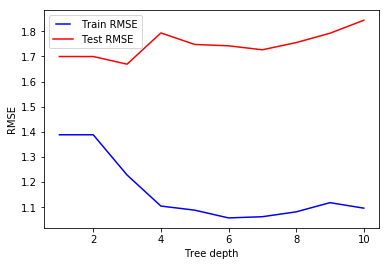

In [76]:
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import pyplot as plt 

line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()

In [48]:
op_depth=6
dt = DecisionTreeClassifier(max_depth=op_depth)
dt.fit(trainX, trainY)
valPred = dt.predict(valX)
mse=math.sqrt(mean_squared_error(valY, valPred))
print(mse)

valY_pred_2=dt.predict(valX)
testY_pred_2=dt.predict(testX)

1.243446386166482


## 3. Random Forest

In [77]:

clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,
                           random_state=0)
clf=clf_RF
clf.fit(trainX, trainY)
valY_pred = clf.predict(valX)
mse = math.sqrt(mean_squared_error(valY, clf.predict(valX)))
print(mse)
#valY.head()


1.507428471100024


In [16]:
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    #print(max_depth)
    dt = RandomForestClassifier(max_depth=max_depth,n_estimators=100)
    dt.fit(trainX, trainY)
    trainPred = dt.predict(trainX)
    train_results.append(mean_squared_error(trainY, trainPred))
    valPred = dt.predict(valX)
    test_results.append(mean_squared_error(valY, valPred))


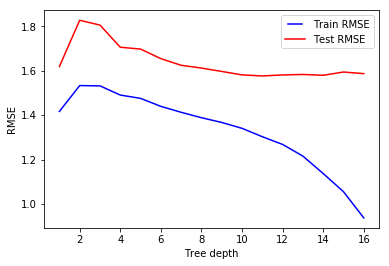

In [18]:
line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()

In [11]:
op_depth=14
dt = RandomForestClassifier(max_depth=op_depth,n_estimators=100)
dt.fit(trainX, trainY)
valPred = dt.predict(valX)
mse=math.sqrt(mean_squared_error(valY, valPred))
print(mse)

valY_pred_3=dt.predict(valX)
testY_pred_3=dt.predict(testX)

1.2574358976280138


## 4 Linear Regression

In [81]:

data=preparation()
naiveVar1_set={'attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y',"harshness"}
naiveVar1=['attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y',"harshness"]

After droping certain trivial attributes in the dataset: (12058, 31)
is there any value missing:  False


C:\Users\guoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


After droping certain trivial attributes in the dataset: (41720, 19)
is there any value missing:  False
shape of train_reviews: (150232, 10)
After droping certain trivial attributes in the dataset: (150232, 10)
shape of validate_queries: (50077, 5)
Index(['Unnamed: 0', 'user_id', 'business_id', 'stars', 'Ind'], dtype='object')
After droping certain trivial attributes in the dataset: (50077, 5)
shape of test_queries: (50078, 3)
Index(['user_id', 'business_id', 'Ind'], dtype='object')
After combining training, validating and testing datasets: (250387, 4)
(150232, 4)


C:\Users\guoji\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After merging our complete dataset with business attributes: (250387, 34)
After merging our complete dataset with user attributes: (250387, 52)
is there any value missing:  False
(50078, 52)
afterselecting some attributions dataset is: (250387, 50)


In [82]:
def attr_tuning(data,attrs):
    
    subsets=chain.from_iterable(combinations(list(attrs),n) for n in range(1,len(attrs)+1))
    result={}
    
    for subset in subsets:
        data_new=data[["Ind",'stars_x']+list(subset)]
        trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
        clf_linear = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
        clf=clf_linear
        clf.fit(trainX, trainY)
        valY_pred = clf.predict(valX)
        valY_pred=np.clip(valY_pred,1,5)
        mse = math.sqrt(mean_squared_error(valY, valY_pred))
        result[frozenset(subset)]=mse
    #return min(result.items(), key=lambda x: x[1])
    print(result)
    return 1

def attr_tuning_2(data,attrs,test=False):
    result=[]
    for n in range(1,len(attrs)+1):
        print(n)
        subsets=combinations(list(attrs),n)
        result_temp={}
        for subset in subsets:
            data_new=data[["Ind",'stars_x']+list(subset)]
            trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
            clf_linear = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
            clf=clf_linear
            clf.fit(trainX, trainY)
            if (not test):
                valY_pred = clf.predict(valX)
                valY_pred=np.clip(valY_pred,1,5)
                mse = math.sqrt(mean_squared_error(valY, valY_pred))
                result_temp[frozenset(subset)]=mse
            
            if(test):
                trainY_pred = clf.predict(trainX)
                trainY_pred=np.clip(trainY_pred,1,5)
                mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
                result_temp[frozenset(subset)]=mse
                

        print(min(result_temp.items(), key=lambda x: x[1]))
        #result.append(min(result_temp.items(), key=lambda x: x[1]))
    return result

In [83]:
res=attr_tuning_2(data,naiveVar1_set,test=True)
print(res)

1
(frozenset({'harshness'}), 1.0200904979248149)
2
(frozenset({'stars_y', 'harshness'}), 0.9282284701158465)
3
(frozenset({'stars_y', 'average_stars', 'harshness'}), 0.9279021242423614)
4
(frozenset({'stars_y', 'average_stars', 'review_count_x', 'harshness'}), 0.9278724945542011)
5
(frozenset({'average_stars', 'review_count_x', 'harshness', 'stars_y', 'aveZipScores'}), 0.9278363585944078)
6
(frozenset({'average_stars', 'review_count_x', 'harshness', 'attributes_RestaurantsPriceRange2', 'stars_y', 'aveZipScores'}), 0.9278160496489607)
7
(frozenset({'review_count_y', 'average_stars', 'review_count_x', 'harshness', 'attributes_RestaurantsPriceRange2', 'stars_y', 'aveZipScores'}), 0.9278093170431718)
[]


In [89]:
def category(item,para):
    A=[]
    for i in range(4):
        if item["review_count_x"]>para[0][i]:
            t=i
    A.append(t)
    for i in range(4):
        if item["review_count_y"]>para[1][i]:
            t=i
    A.append(t)
    return A[0]+A[1]*4

def category_new(item,para):
    A=[]
    for i in range(4):
        if item["review_count_x"]>para[0][i]:
            t=i
    A.append(t)
    for i in range(4):
        if item["review_count_y"]>para[1][i]:
            t=i
    A.append(t)
    
    t=A[0]+A[1]*4
    if(t>11):
        return t
    return 16

def attr_tuning_3(data,para,attrs):
    data=data[["Ind",'stars_x']+attrs]
    print(data.shape[0])
    cat=[]
    for i in range(data.shape[0]):
        cat.append(category(data.loc[i],para))
       # if(i-5000==0):
        #    print(i)
         #   break           
    cat=pd.DataFrame({"datacat":cat})
    data=pd.concat([data,cat],axis=1,sort=False)
    #print(data.head())
    typelist=[]
    kernellist=[]
    
    for i in range(16):
        data_new=data[data["datacat"]==i]
        print("dataset of type ",i, "has shape",data_new.shape[0])
        #print(data_new.head())
        if data_new.shape[0]==0:
            typelist.append(None)
            kernellist.append(None)
            continue
        typelist.append(data_new)
        trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
        print(trainX.shape)
        clf = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
        clf.fit(trainX, trainY)
        kernellist.append(clf)
        
        trainY_pred=np.clip(clf.predict(trainX),1,5)
        mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
        print(mse)
        valY_pred=np.clip(clf.predict(valX),1,5)
        mse = math.sqrt(mean_squared_error(valY, valY_pred))
        print(mse)

    trainX,trainY,valX,valY,testX=data_sep(data,simple=True)

    trainY_pred=[]
    count=0
    for i in range(trainX.shape[0]):
        count+=1
#        if(count%10000==0):
#            print(count)
#fix kernellist ->category below
        trainY_pred.append(
            np.clip(kernellist[category(trainX.loc[i],para)].predict(trainX.loc[i].values.reshape(1, -1)),1,5)
        )
    mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
    print("mse for training dataset",mse)
    trainY_pred=[]
    
    valY_pred=[]                
    for i in range(valX.shape[0]):
        valY_pred.append(
            np.clip(kernellist[category(valX.loc[i],para)].predict(valX.loc[i].values.reshape(1, -1)),1,5)
        )
    mse = math.sqrt(mean_squared_error(valY, valY_pred))
    print("mse for validating dataset",mse)

In [90]:

# after trying attr, one find only 'stars_y','average_stars' matters mse for linear model
attr_tuning_3(data,[[-1,130,180,300],[-1,3,8,27]],naiveVar1)

250387
dataset of type  0 has shape 1109
(293, 8)
0.4022144337901864
1.3277867711801539
dataset of type  1 has shape 1189
(331, 8)
0.5106358901791409
1.3745524427603584
dataset of type  2 has shape 1722
(485, 8)
0.46106121232251357
1.3661530446074062
dataset of type  3 has shape 3033
(925, 8)
0.4463610503371056
1.5078327813251502
dataset of type  4 has shape 1646
(545, 8)
0.7831749469157316
1.3946149386782287
dataset of type  5 has shape 1799
(601, 8)
0.7596336646138752
1.3454126074730683
dataset of type  6 has shape 2867
(1055, 8)
0.7562596776661685
1.4747485092874086
dataset of type  7 has shape 5245
(2138, 8)
0.7111853804398697
1.4157823549248845
dataset of type  8 has shape 3773
(1629, 8)
0.9739295028643387
1.3402132094485504
dataset of type  9 has shape 4567
(1993, 8)
0.9778523448966663
1.399684453553656
dataset of type  10 has shape 6963
(3056, 8)
0.9553700152418201
1.3637975913222962
dataset of type  11 has shape 15129
(7124, 8)
0.8844522572485591
1.3572650218210631
dataset of t

In [64]:
class slightly_better3:
    def _init_():
        pass
    
    def predict(self,test):
        pred_star = []
        test=test.reset_index(drop=True)
        for i in range(test.shape[0]):
            harsh = test.loc[i,"harshness"]

            if abs(harsh - 1) > 0.3:
                harsh = 1
            pred_star.append(min(5, test.loc[i,"stars_y"] * harsh))

        return pred_star 

def attr_tuning_4(data,para,attrs):
    data=data[["Ind",'stars_x']+attrs]
    print(data.shape[0])
    cat=[]
    for i in range(data.shape[0]):
        cat.append(category_new(data.loc[i],para))
       # if(i-5000==0):
        #    print(i)
         #   break           
    cat=pd.DataFrame({"datacat":cat})
    data=pd.concat([data,cat],axis=1,sort=False)
    print("datacat is generated")
    
    
    #print(data.head())
    typelist=[]
    kernellist=[]
    
    for i in range(16):
        data_new=data[data["datacat"]==i]
        print("dataset of type ",i, "has shape",data_new.shape[0])
        #print(data_new.head())
        if data_new.shape[0]==0:
            typelist.append(None)
            kernellist.append(None)
            continue
        typelist.append(data_new)
        trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
        print(trainX.shape)
        clf = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
        clf.fit(trainX, trainY)
        kernellist.append(clf)
        
        trainY_pred=np.clip(clf.predict(trainX),1,5)
        mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
        print(mse)
        valY_pred=np.clip(clf.predict(valX),1,5)
        mse = math.sqrt(mean_squared_error(valY, valY_pred))
        print(mse)
        
    #for type 16
    i=16
    data_new=data[data["datacat"]==16]
    print("dataset of type ",i, "has shape",data_new.shape[0])
    def model_choose(data_new,kernellist):
        trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
        print(trainX.shape)
        
        op_depth=6
        model=[DecisionTreeClassifier(max_depth=op_depth),linear_model.LinearRegression(normalize=True),slightly_better3()]
        result=[]
        
        for i in range(3):
            if(i!=2):
                model[i].fit(trainX, trainY)
            trainY_pred = model[i].predict(trainX)
            valY_pred = model[i].predict(valX)
            
            mse=math.sqrt(mean_squared_error(trainY, trainY_pred))
            print(mse)
            
            mse=math.sqrt(mean_squared_error(valY, valY_pred))
            print(mse)
            result.append(mse)
        print("best model is ",result.index(min(result)))
        kernellist.append(model[result.index(min(result))])
        
    model_choose(data_new,kernellist)

    #print(data_new.head())
    trainX,trainY,valX,valY,testX=data_sep(data,simple=True)

    trainY_pred=[]
    count=0
    for i in range(trainX.shape[0]):
        count+=1
#        if(count%10000==0):
#            print(count)
        trainY_pred.append(
            np.clip(kernellist[trainX["datacat"].loc[i]].predict(trainX.loc[[i]]),1,5)
        )
    mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
    print("mse for training dataset",mse)
    trainY_pred=[]
    
    valY_pred=[]                
    for i in range(valX.shape[0]):
        valY_pred.append(
            np.clip(kernellist[valX["datacat"].loc[i]].predict(valX.loc[[i]]),1,5)
        )
    mse = math.sqrt(mean_squared_error(valY, valY_pred))
    print("mse for validating dataset",mse)
    testY_pred=[]                
    for i in range(testX.shape[0]):
        testY_pred.append(
            np.clip(kernellist[testX["datacat"].loc[i]].predict(testX.loc[[i]]),1,5)
    )
    return testY_pred

testY_pred_44=attr_tuning_4(data,[[-1,130,180,300],[-1,3,8,27]],naiveVar1)

250387
datacat is generated
dataset of type  0 has shape 0
dataset of type  1 has shape 0
dataset of type  2 has shape 0
dataset of type  3 has shape 0
dataset of type  4 has shape 0
dataset of type  5 has shape 0
dataset of type  6 has shape 0
dataset of type  7 has shape 0
dataset of type  8 has shape 0
dataset of type  9 has shape 0
dataset of type  10 has shape 0
dataset of type  11 has shape 0
dataset of type  12 has shape 25100
(15576, 8)
0.9612088417088828
1.0678128658661874
dataset of type  13 has shape 30316
(18975, 8)
0.9431560768808019
1.101477348003956
dataset of type  14 has shape 44878
(27701, 8)
0.9526592975051282
1.078206024156598
dataset of type  15 has shape 101051
(67805, 8)
0.924140623004688
1.0804299979149354
dataset of type  16 has shape 49042
(20175, 8)
0.9966735255241774
1.6167132463441307
0.8672072787602892
1.410576008193699
1.20485819681489
1.3777172647157034
best model is  2
mse for training dataset 0.9776988626407616
mse for validating dataset 1.175056902722

Training dataset: (150232, 6)
Validating dataset: (50077, 6)
Testing dataset: (50078, 6)
1.0076445497337214
[('attributes_RestaurantsPriceRange2', 88.09209337113982, 6.330705205897207e-21), ('aveZipScores', 12508.321959230345, 0.0), ('average_stars', 179659.41850176008, 0.0), ('stars_y', 194628.21458487154, 0.0)]
1.0523673245266132
1.0504456688254342


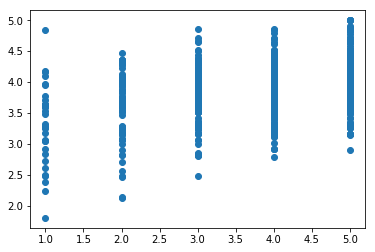

In [116]:
#playground for linear model


naiveVar5=['attributes_RestaurantsPriceRange2',
            'aveZipScores',
            'average_stars',
            'stars_y']
Var=naiveVar5
data=data[["Ind","stars_x"]+Var]
#print(data.columns)
trainX,trainY,valX,valY,testX=data_sep(data)

clf_linear = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
clf=clf_linear
clf.fit(trainX, trainY)

trainY_pred = clf.predict(trainX)
mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
print(mse)
from sklearn import feature_selection
#print(trainX.shape)

temp=feature_selection.f_regression(trainX,trainY_pred)
print( list(zip(trainX.columns,temp[0],temp[1])))

valY_pred = clf.predict(valX)

mse = math.sqrt(mean_squared_error(valY, valY_pred))
print(mse)

valY_pred=np.clip(valY_pred,1,5)
mse = math.sqrt(mean_squared_error(valY, valY_pred))
print(mse)
plt.plot(valY[:1000],valY_pred[:1000],'o')
testY_pred = clf.predict(testX)

valY_pred_4 = clf.predict(valX)
testY_pred_4=np.clip(testY_pred,1,5)
#valY.head()



## 5 Dummy and slightly better 2

In [53]:
def round_of_rating(number):
        return round(number * 2) / 2

#it will took a very long time/J.G.
def harsh_generator(test,train):
    test_user_ids = list(test["user_id"])
    train_user_ids = list(train["user_id"])
    train_business_ids = list(train["business_id"])
    # Generating Harshness Score for each user in test set
    count=0
    print(len(test_user_ids))
    harshness={}
    for user in test_user_ids:
        count+=1
        if(count%5000==0):
            print(count)        
        if user in harshness:
            continue
        #print(count)

        related_train_info = train[(train.user_id == user)]
        rated_biz = list(related_train_info["business_id"])
        n_ratings = len(related_train_info)

        sum_ratings_given = sum(related_train_info["stars"])

        sum_biz_ratings = 0

    # Calculating sum_biz_ratings, which is the sum of each business's overall yelp rating
    # If none found, use the user's rating for this biz as its overall yelp rating
        for i in range(n_ratings):
            biz = rated_biz[i]
            if biz in train_business_ids:
                sum_biz_ratings += float(business[(business.business_id == biz)]["stars"])
            else:
                sum_biz_ratings += float(related_train_info[(related_train_info.business_id == biz)]["stars"])

        if sum_biz_ratings == 0:
            harshness[user] = 1
        else:
            harshness[user] = sum_ratings_given / sum_biz_ratings
    return harshness
            
def harshness_saver(harshness,file_name):
    dic={'user_id':list(harshness.keys()),'harshness':list(harshness.values())}
    df=pd.DataFrame(data=dic)
    print(df)
    df.to_csv(file_name, sep='\t')

def harshness_loader(file_name):
    harshness={}
    df=pd.DataFrame.from_csv(file_name,sep='\t')
    #df.head()
    for i in range(df.shape[0]):
        harshness[df['keys'].loc[i]]=df['values'].loc[i]
    return harshness

def pred_Y(test,users,business,harshness):        
    test_user_ids = list(test["user_id"])
    test_business_ids = list(test["business_id"])
   # print(test.shape)

    user_avg_stars = list(users["average_stars"])
    user_ids_from_users = list(users["user_id"])
    user_avg = dict(zip(user_ids_from_users, user_avg_stars))

    #print(len(test))
    biz_ids  = list(business['business_id'])
    avg_stars = list(business['stars'])
    avg = dict(zip(biz_ids, avg_stars))
    #users.head()

    pred_star = []
    for i in range(len(test)):
        biz  = test_business_ids[i]
        user = test_user_ids[i]
        harsh = harshness[user]
        
        if abs(harsh - 1) > 0.3:
            harsh = 1
        if biz in biz_ids:
            pred_star.append(  min(5, avg[biz] * harsh) )
        else:
            if user in user_ids_from_users:
                pred_star.append(float(user_avg[user]))
            else:
                pred_star.append(4)
    return pred_star 

def slightly_better2(business,users,train,test,file_name="harsh_allusers.csv",loadharsh=True):
    if(not loadharsh):
        harshness=harsh_generator(test,train)
        harshness_saver(harshness,file_name)
    if(loadharsh):
        harshness=harshness_loader(file_name)
    return pred_Y(test,users,business,harshness)




    

In [ ]:
##compuation starts here

business = pd.read_csv("./business.csv"); 
users = pd.read_csv("./users.csv"); 
train = pd.read_csv("./train_reviews.csv"); 
test  = pd.read_csv("./test_queries.csv");
testY_pred_5=slightly_better2(business,users,train,test,'harshness_test.csv',loadharsh=True)

val = pd.read_csv("validate_queries.csv")
valY_pred_5=slightly_better2(business,users,train,val,'harshness_val.csv',loadharsh=True)

data=preparation()
trainX,trainY,valX,valY,testX=data_sep(data)

#print(valY.shape)
#print(len(valY_pred_5))
mse = math.sqrt(mean_squared_error(valY, valY_pred_5))
print(mse)


In [47]:
#this will take an hour to finish.  So do not run this module

business = pd.read_csv("./business.csv"); 
users = pd.read_csv("./users.csv"); 
train = pd.read_csv("./train_reviews.csv"); 
test  = pd.read_csv("./test_queries.csv");

harshness=harsh_generator(users,train)
len(harshness)
#harshness_saver(harshness,"harsh_train.csv")
harshness_saver(harshness,"harshness_allusers.csv")
harshness


41720
5000
10000
15000
20000
25000
30000
35000
40000


{'UxfpKHGO2dfQCdS9xLLJow': 1.1304347826086956,
 'Kr5NDQFPPB_01-5CDmSqVg': 1,
 'wfoeMtriLwZsdRzcxNTaFA': 1,
 'aXb0kCIsIbPEEUSGomrrmA': 1,
 'sLrX2KGu3lc_JczAnsg0_Q': 1.0,
 'nmYitfmo-pQ1hJWDnTLwGg': 1.4736842105263157,
 '5tm0BfJEWGJWowr3sPGb8Q': 1,
 'PzHuq79aP6G25kEv-hejOA': 1,
 'GVYg18F-Rkuk63hvtHoG5Q': 1,
 '0IqKVB1rbaDyz0wlefmiAA': 1,
 'Xa5-jiXsUBp5dXpGfc4FsQ': 1,
 'EJz2Cbe0dfe1ESqAnKm6IA': 1,
 'AolnyiEB_UMlQtD_dp5E9g': 1,
 'H0YMJC37tK41ez5i4Zpl6g': 1,
 'YOv5yrFsKmhWstyokKqoUw': 0.2857142857142857,
 'R60n9HyCV2lde8RPfcGN5A': 1,
 'fdrPsVEQX8EPaPd96o58Nw': 1.0,
 'deHgmqaKc2HctB9uTJsvDA': 0.8484848484848485,
 '1pNRnbTqpc4mcVeiNF72iw': 1,
 'vfttwzyvyrsVcioAiQUfIg': 1,
 'w_dZ3beSUs_wwkkPudBrsw': 1,
 'ThEUWXkgLbi5RiulgybrTA': 1,
 'FsQnb4uPIAf3RP3DTHTF7A': 0.2857142857142857,
 'f-B7cfDygv9WODfX6gGUxw': 1,
 'am939PCn6atEdrhK6hRRiQ': 1,
 'FGGnzZCsx4fOCW5oqX5f4g': 1,
 'L5mQ7YWJNf6KKvvWLggEBQ': 0.5714285714285714,
 'JesJ-LaNfr3pKhL7gWhDrw': 1,
 '2dhWQjaSPDe0ifDwGT-A5A': 1.0,
 'dxLg69qHeIDbl66pTk-5

## 6 Logistic regression

In [70]:
data=preparation()

After droping certain trivial attributes in the dataset: (12058, 31)
is there any value missing:  False


C:\Users\guoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


After droping certain trivial attributes in the dataset: (41720, 19)
is there any value missing:  False
shape of train_reviews: (150232, 10)
After droping certain trivial attributes in the dataset: (150232, 10)
shape of validate_queries: (50077, 5)
Index(['Unnamed: 0', 'user_id', 'business_id', 'stars', 'Ind'], dtype='object')
After droping certain trivial attributes in the dataset: (50077, 5)
shape of test_queries: (50078, 3)
Index(['user_id', 'business_id', 'Ind'], dtype='object')
After combining training, validating and testing datasets: (250387, 4)
(150232, 4)


C:\Users\guoji\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After merging our complete dataset with business attributes: (250387, 34)
After merging our complete dataset with user attributes: (250387, 52)
is there any value missing:  False
(50078, 52)
afterselecting some attributions dataset is: (250387, 50)


Training dataset: (150232, 8)
Validating dataset: (50077, 8)
Testing dataset: (50078, 8)
1.2119302625947772
1.257753476058775
1.257753476058775


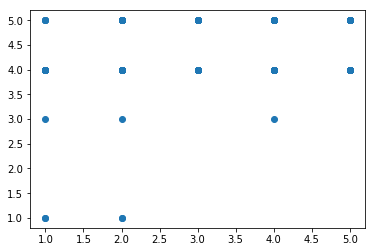

In [71]:
from sklearn import linear_model
naiveVar1=['Ind','stars_x','attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y']
naiveVar2=['Ind','stars_x',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y']#no range
naiveVar3=['Ind','stars_x',
          'review_count_x','stars_y','average_stars','review_count_y']#no aveZipScores
naiveVar4=['Ind','stars_x','stars_y','average_stars']#no aveZipScores
# after trying attr, one find only 'stars_y','average_stars' matters mse for linear model

data=data[naiveVar1]
trainX,trainY,valX,valY,testX=data_sep(data)
clf_linear = linear_model.LogisticRegression()# normalize or not does not matter
clf=clf_linear
clf.fit(trainX, trainY)

trainY_pred = clf.predict(trainX)
mse = math.sqrt(mean_squared_error(trainY, trainY_pred))
print(mse)

valY_pred = clf.predict(valX)
mse = math.sqrt(mean_squared_error(valY, valY_pred))
print(mse)

valY_pred=np.clip(valY_pred,1,5)
mse = math.sqrt(mean_squared_error(valY, valY_pred))
print(mse)
plt.plot(valY[:1000],valY_pred[:1000],'o')
testY_pred = clf.predict(testX)

valY_pred_6 = clf.predict(valX)
testY_pred_6=np.clip(testY_pred,1,5)
#valY.head()



## 7 Qudratic regression

In [91]:
naiveVar1=['attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y',"harshness"]
# after trying attr, one find only 'stars_y','average_stars' matters mse for linear model
data=preparation()


After droping certain trivial attributes in the dataset: (12058, 31)
is there any value missing:  False


C:\Users\guoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


After droping certain trivial attributes in the dataset: (41720, 19)
is there any value missing:  False
shape of train_reviews: (150232, 10)
After droping certain trivial attributes in the dataset: (150232, 10)
shape of validate_queries: (50077, 5)
Index(['Unnamed: 0', 'user_id', 'business_id', 'stars', 'Ind'], dtype='object')
After droping certain trivial attributes in the dataset: (50077, 5)
shape of test_queries: (50078, 3)
Index(['user_id', 'business_id', 'Ind'], dtype='object')
After combining training, validating and testing datasets: (250387, 4)
(150232, 4)


C:\Users\guoji\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After merging our complete dataset with business attributes: (250387, 34)
After merging our complete dataset with user attributes: (250387, 52)
is there any value missing:  False
(50078, 52)
afterselecting some attributions dataset is: (250387, 50)


In [93]:
attrs=naiveVar1
attrs_quad=[]
for attr1 in list(attrs):
    for attr2 in list(attrs):
        temp=frozenset({attr1,attr2})
        if temp in attrs_quad:
            continue
        attrs_quad.append(temp)
        data[temp]=pd.Series(np.array(data[attr1])*np.array(data[attr2]))
        
#print(["Ind",'stars_x']+attrs+attrs_quad)
data_new=data[["Ind",'stars_x']+attrs+attrs_quad] 
trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
clf_linear = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
clf=clf_linear
clf.fit(trainX, trainY)
valY_pred = clf.predict(valX)
valY_pred=np.clip(valY_pred,1,5)
mse = math.sqrt(mean_squared_error(valY, valY_pred))
print(mse)

1.1956499795615245


In [ ]:
# Do not run this module. Since it took a very long time to finish
from sklearn import linear_model
from itertools import chain, combinations

def attr_tuning(data,attrs):
    attrs_quad=set()
    for attr1 in list(attrs):
        for attr2 in list(attrs):
            temp=frozenset({attr1,attr2})
            attrs_quad.add(temp)
            data[temp]=pd.Series(np.array(data[attr1])*np.array(data[attr2]))
        
    attrs_all=attrs|attrs_quad       
    subsets=chain.from_iterable(combinations(list(attrs_all),n) for n in range(1,len(attrs_all)+1))
    result={}
    
    for subset in subsets:
        data_new=data[["Ind",'stars_x']+list(subset)]

        trainX,trainY,valX,valY,testX=data_sep(data_new,simple=True)
        clf_linear = linear_model.LinearRegression(normalize=True)# normalize or not does not matter
        clf=clf_linear
        clf.fit(trainX, trainY)
        valY_pred = clf.predict(valX)
        valY_pred=np.clip(valY_pred,1,5)
        mse = math.sqrt(mean_squared_error(valY, valY_pred))
        result[frozenset(subset)]=mse
    return min(result.items(), key=lambda x: x[1]) 

naiveVar1={'attributes_RestaurantsPriceRange2',
          'review_count_x','stars_y','aveZipScores','average_stars','review_count_y',"harshness"}

res=attr_tuning(data,naiveVar1)
res

# 8. Neural Networks

<p style="color:red;font-size:20px;"> Please modify the derectories first before running the following section</p>


In [4]:
# Read Files
business = pd.read_csv("./data/business.csv"); 
users = pd.read_csv("./data/users.csv"); 
train = pd.read_csv("./data/train_reviews.csv"); 
test  = pd.read_csv("./data/test_queries.csv");

In [5]:
train = train.drop(columns = ['cool', 'date', 'funny', 'review_id', 'text', 'useful'])
train.head()

,business_id,stars,user_id
0,WPCgtEG-bJt0cZtnM-x7yw,4.0,VDh1vjzpNUJH6HfcjH8g7Q
1,LnnO7quTjjdTUkCshSJnkA,5.0,HnnjIuLrdhLTsRRVrrFIjA
2,sKrlmbrZWCyLIgiMihCPqw,5.0,HnnjIuLrdhLTsRRVrrFIjA
3,Lh5qnT2m2b4lvyYiMGMDkg,4.0,HnnjIuLrdhLTsRRVrrFIjA
4,54LYVM1gCGQ2UVFK9QhgTw,5.0,HnnjIuLrdhLTsRRVrrFIjA


In [6]:
biz_stars = dict(zip(business.business_id, business.stars)) # from business.csv
usr_stars = dict(zip(users.user_id, users.average_stars)) # from users.csv

In [7]:
train_biz_stars = dict(zip(train.business_id, train.stars))
train_usr_stars = dict(zip(train.user_id, train.stars))

In [8]:
biz_avg = []
user_avg = []
train_biz_ids = train.business_id.tolist()
train_usr_ids = train.user_id.tolist()

for b in train_biz_ids:
    if b in biz_stars:
        biz_avg.append(biz_stars[b])
    else:
        biz_avg.append(train_biz_stars[b])
        
for u in train_usr_ids:
    if u in usr_stars:
        user_avg.append(usr_stars[u])
    else:
        user_avg.append(train_usr_stars[u])

In [9]:
train["business_avg"] = biz_avg
train["user_avg"] = user_avg

train.head()

,business_id,stars,user_id,business_avg,user_avg
0,WPCgtEG-bJt0cZtnM-x7yw,4.0,VDh1vjzpNUJH6HfcjH8g7Q,4.0,5
1,LnnO7quTjjdTUkCshSJnkA,5.0,HnnjIuLrdhLTsRRVrrFIjA,4.0,5
2,sKrlmbrZWCyLIgiMihCPqw,5.0,HnnjIuLrdhLTsRRVrrFIjA,2.5,5
3,Lh5qnT2m2b4lvyYiMGMDkg,4.0,HnnjIuLrdhLTsRRVrrFIjA,3.5,5
4,54LYVM1gCGQ2UVFK9QhgTw,5.0,HnnjIuLrdhLTsRRVrrFIjA,4.5,5


In [10]:
# After trials, we have decided to drop the id columns
# in order to achieve better models
train = train.drop(columns = ["business_id", "user_id"])
train["user_avg"] = train["user_avg"].astype(float)
train.head()

,stars,business_avg,user_avg
0,4.0,4.0,5.0
1,5.0,4.0,5.0
2,5.0,2.5,5.0
3,4.0,3.5,5.0
4,5.0,4.5,5.0


In [11]:
# Normalize
train["stars"] =  train["stars"]/5
train["business_avg"] = train["business_avg"] / 5
train["user_avg"] = train["user_avg"] / 5

In [12]:
train_X = train.iloc[:135210].drop(columns = 'stars')
train_y = train.iloc[:135210]["stars"]
test_X  = train.iloc[135211:].drop(columns = 'stars')
test_y  = train.iloc[135211:]["stars"]

In [13]:
train_X.shape

(135210, 2)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(64, input_dim = 2, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(1, activation=tf.nn.relu)
])

In [20]:
optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(optimizer=optimizer, 
              loss='MSE')

In [21]:
model.fit(train_X, train_y, epochs = 3)

Epoch 1/3
135210/135210 [==============================] - 5s 35us/step - loss: 0.0469
Epoch 2/3
135210/135210 [==============================] - 5s 33us/step - loss: 0.0439
Epoch 3/3
135210/135210 [==============================] - 5s 34us/step - loss: 0.0439


In [22]:
predictions = model.predict(test_X)

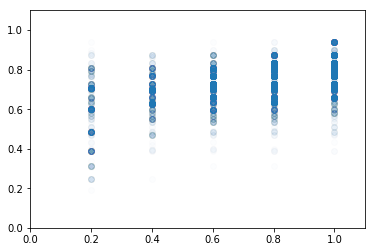

In [23]:
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.plot(test_y[:10000], predictions[:10000], 'o', alpha = 0.01)

In [24]:
# Fitting on test data
test.head()

,user_id,business_id
0,XEDaNNCTVAqPpvyX2zY03g,e880MGw6C6PJL-n3EJoY_g
1,E9WotdbCBpoeID-DHSQh1A,ExLXL_oQvI7oPB7TrVpGhg
2,8erAzkOo9KHs1Njo5bMm_Q,XKQsxvDMe9rAWO0P0Uwx-Q
3,eHJTLVy1bm7zSGVQlNH6KA,awI4hHMfa7H0Xf0-ChU5hg
4,KF2L4CDnmPz6diaH6TrxbA,jKrlc4xQIvfzDZ8eNfqxwg


In [25]:
test_biz_avg = []
test_usr_avg = []

for b in test.business_id:
    if b in biz_stars:
        test_biz_avg.append(biz_stars[b])
    else:
        test_biz_avg.append(5)
        
for u in test.user_id:
    if u in usr_stars:
        test_usr_avg.append(usr_stars[u])
    else:
        test_usr_avg.append(5)

In [26]:
test["business_avg"] = test_biz_avg
test["user_avg"] = test_usr_avg
test = test.drop(columns = ["user_id", "business_id"])
test.head()

,business_avg,user_avg
0,4.0,5
1,4.0,5
2,4.0,5
3,4.5,5
4,2.5,5


In [27]:
test["business_avg"] = test["business_avg"].astype(float) /5
test["user_avg"] = test["user_avg"].astype(float) /5

test_pred = model.predict(test)

In [28]:
submit = pd.DataFrame()
submit['index'] = list(range(len(test)))
submit['stars'] = test_pred * 5
submit.head()

# And you choose to save the dataframe 
# submit.to_csv("nn.csv", index=False)

,index,stars
0,0,4.032729
1,1,4.032729
2,2,4.032729
3,3,4.363236
4,4,2.913657


## 9. Comparison of different algorithm(aborted)

## valY

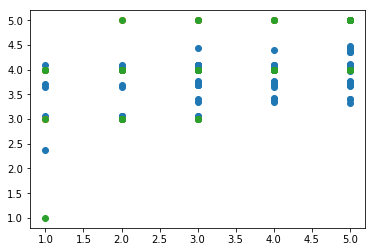

In [21]:
n=100plt.plot(valY[:n],valY_pred_4[:n],'o')
plt.plot(valY[:n],valY_pred_3[:n],'o')
plt.plot(valY[:n],valY_pred_2[:n],'o')

## testY

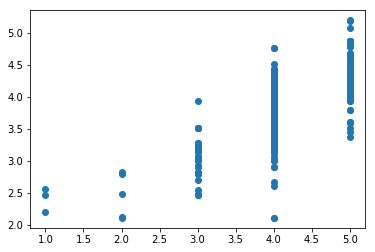

In [165]:
plt.plot(testY_pred_3[:1000],testY_pred_4[:1000],'o')

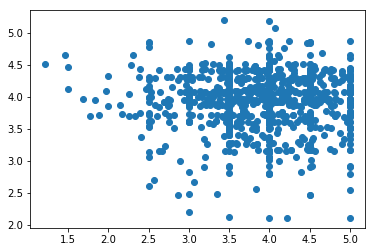

In [166]:
plt.plot(testY_pred_5[:1000],testY_pred_4[:1000],'o')

## 10. Produce Results for testing dataset (ready to submit)

In [67]:
submit = pd.DataFrame()
submit['index'] = list(range(len(testY_pred_44)))
for i in range(len(testY_pred_44)):
    testY_pred_44[i]=testY_pred_44[i][0]

submit['stars'] = testY_pred_44
print(submit.head())
submit.to_csv("linear-revised-tunedV4.csv", index=False)

   index     stars
0      0  3.941195
1      1  3.159163
2      2  3.513708
3      3  3.208747
4      4  3.176099
